In [1]:
# load packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

import seaborn as sns
import matplotlib.pyplot as plt

import re


In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
def data_exploration(df):
    print("----------Shape of Data----------")
    print(df.shape)
    print("----------Top-5- Record----------")
    print(df.head(5))
    print("-----------Information-----------")
    print(df.info())
    print("-----------Data Types-----------")
    print(df.dtypes)
    print("----------Missing value-----------")
    print(df.isnull().sum())
    print("----------Null value-----------")
    print(df.isna().sum())
    

In [4]:
data_exploration(movies)

----------Shape of Data----------
(10329, 3)
----------Top-5- Record----------
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object

In [5]:
data_exploration(ratings)

----------Shape of Data----------
(105339, 4)
----------Top-5- Record----------
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None
-----------Data Types-----------
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
----------Missing value-----------
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
--

In [6]:
df = pd.merge(movies,ratings, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [7]:
df['movieId'] = df['movieId'].astype(np.int16)
df['userId'] = df['userId'].astype(np.int16)
df['rating'] = df['rating'].astype(np.int16)

In [16]:
# top 10 movies based on rating
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Time of the Gypsies (Dom za vesanje) (1989)    5.0
Barenaked in America (1999)                    5.0
Beast of War, The (Beast, The) (1988)          5.0
Cul-de-sac (1966)                              5.0
Heaven & Earth (1993)                          5.0
                                              ... 
Hellraiser: Hellworld (2005)                   0.0
Paul Blart: Mall Cop 2 (2015)                  0.0
Full Body Massage (1995)                       0.0
Annie (2014)                                   0.0
Guilt Trip, The (2012)                         0.0
Name: rating, Length: 10323, dtype: float64

In [36]:
df['split']=df['title'].str.split('(')
df['title']=df['split'].map(lambda x:x[0].strip())
df['year']=df['split'].map(lambda x: x[1].replace(')','').strip())

In [52]:
df.head()

,movieId,title,genres,userId,rating,timestamp,split,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,5,859046895,"[Toy Story , 1995)]",1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4,1303501039,"[Toy Story , 1995)]",1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,8,5,858610933,"[Toy Story , 1995)]",1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,11,4,850815810,"[Toy Story , 1995)]",1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,14,4,851766286,"[Toy Story , 1995)]",1995


In [53]:
df.drop('split',axis=1,inplace=True)

In [55]:
df['split']=df['genres'].str.split('|')

In [60]:
df.head()

,movieId,title,genres,userId,rating,timestamp,year,split
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,5,859046895,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4,1303501039,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,8,5,858610933,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,11,4,850815810,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,14,4,851766286,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"


In [77]:
common_genres=df.split.explode().unique().tolist()

In [78]:
for i in common_genres:
    df[i] = 0
for i in range(df.shape[0]):
    for j in common_genres:
        if(j in df['split'].iloc[i]):
            df.loc[i,j] = 1

In [80]:
df.drop(['genres','split'],axis=1,inplace=True)

In [82]:
df.head()

,movieId,title,userId,rating,timestamp,year,Adventure,Animation,Children,Comedy,...,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir,(no genres listed)
0,1,Toy Story,2,5,859046895,1995,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,5,4,1303501039,1995,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,8,5,858610933,1995,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story,11,4,850815810,1995,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,14,4,851766286,1995,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().sum()

movieId                    0
title                     37
userId                     0
rating                     0
timestamp                  0
year                       2
Adventure                  0
Animation                  0
Children                   0
Comedy                     0
Fantasy                    0
Romance                    0
Drama                      0
Action                     0
Crime                      0
Thriller                   0
Horror                     0
Mystery                    0
Sci-Fi                     0
IMAX                       0
War                        0
Musical                    0
Documentary                0
Western                    0
Film-Noir                  0
(no genres listed)         0
avg_rating            105339
rating_count          105339
dtype: int64

In [107]:
df.dropna(axis=0,inplace=True)

In [108]:
ratings_df = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_df['rating_count'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [112]:
ratings_df

,rating,rating_count
title,,
'71,3.000000,1
'Hellboy': The Seeds of Creation,3.000000,1
'Round Midnight,2.000000,1
'Til There Was You,4.000000,3
"'burbs, The",2.900000,20
...,...,...
loudQUIETloud: A Film About the Pixies,4.000000,1
xXx,2.666667,24
xXx: State of the Union,2.000000,7


In [118]:
ratings_df.rename(columns={'rating':'avg_rating'},inplace=True)

In [121]:
df=df.merge(ratings_df,on='title')

In [122]:
df.loc[:,['title','avg_rating','rating_count']].head()

,title,avg_rating,rating_count
0,Toy Story,3.831897,232
1,Toy Story,3.831897,232
2,Toy Story,3.831897,232
3,Toy Story,3.831897,232
4,Toy Story,3.831897,232


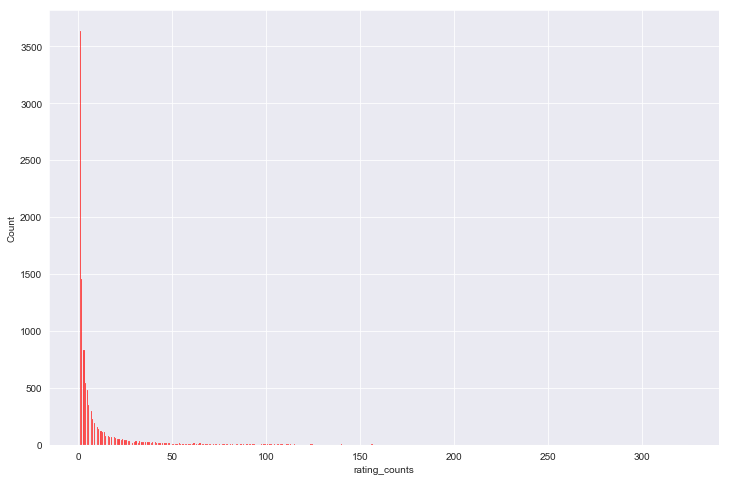

In [20]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,8))
sns.histplot(ratings_df['rating_count'],color='r')
plt.show()

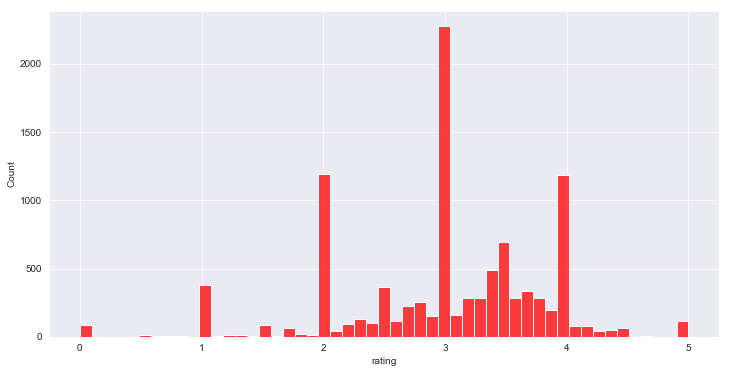

In [21]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,6))
sns.histplot(ratings_df['avg_rating'],color='r')
plt.show()

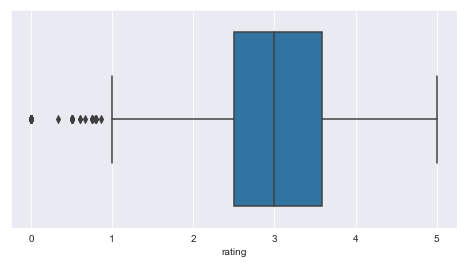

In [23]:
plt.subplots(figsize=(8,4))
sns.boxplot(ratings_df['avg_rating'])

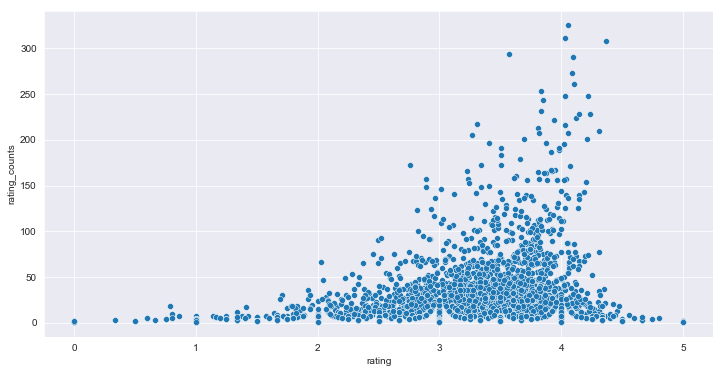

In [24]:
plt.subplots(figsize=(12,6))
sns.scatterplot(ratings_df['avg_rating'],ratings_df['rating_count'])
plt.show()

In [159]:
C= df['avg_rating'].mean()
m= df['rating_count'].quantile(0.95)
filtered_movies = df[['title','rating_count', 'avg_rating']].loc[df['rating_count'] >= m]
filtered_movies.drop_duplicates(keep='last',inplace=True)

def weighted_rating(data, m=m, C=C):
    v = data['rating_count']
    R = data['avg_rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
# Define a new feature 'score' and calculate its value with `weighted_rating()`
filtered_movies['score'] = filtered_movies.apply(weighted_rating, axis=1)

#Sort movies based on score calculated above
filtered_movies = filtered_movies.sort_values('score', ascending=False)
filtered_movies.head(15)

,title,rating_count,avg_rating,score
10018,"Shawshank Redemption, The",308,4.370130,3.972423
23129,"Godfather, The",210,4.314286,3.850834
16312,Schindler's List,248,4.217742,3.836918
2869,"Usual Suspects, The",228,4.236842,3.829420
18876,"Silence of the Lambs, The",290,4.100000,3.800398
9145,Pulp Fiction,325,4.052308,3.790973
54456,"Matrix, The",261,4.103448,3.783756
7918,Star Wars: Episode IV - A New Hope,273,4.087912,3.782912
29310,Star Wars: Episode V - The Empire Strikes Back,228,4.144737,3.781144
11513,Forrest Gump,311,4.028939,3.769880


In [215]:
def total_rating(userid,movieid):
    return (df.loc[(df.userId==userid) & (df.movieId == movieid),'rating'].iloc[0])


def correlation_score(user1,user2):
    watched_by_both=[]
    
    # Finding movies watched by both the users.
    for element in df.loc[df.userId==user1,'movieId'].tolist():
        if element in df.loc[df.userId==user2,'movieId'].tolist():
            watched_by_both.append(element)
    
    # nothing in common
    if len(watched_by_both) == 0 :
        return 0
    
    user_1 = pd.DataFrame({'rating':[total_rating(user1,element) for element in watched_by_both]})
    user_2 = pd.DataFrame({'rating':[total_rating(user2,element) for element in watched_by_both]})
    
    corr=round(user_1.corrwith(user_2).values[0],4)
    if np.isnan(corr):
        return 0
    else:
        return corr


In [227]:
def similar_users_(user1,number_of_users):
    # Getting distinct user ids.
    user_ids = df.userId.unique().tolist()
    similarity_score = [(correlation_score(user1,user),user) for user in user_ids[:50] if user != user1]
    similarity_score.sort(reverse=True)
    return similarity_score[:number_of_users]

In [222]:
def get_movie_title(movieid):
    return (df.loc[(df.movieId == movieid),'title'].iloc[0])

def get_recommendation(userid):
    user_ids = df.userId.unique().tolist()
    total = {}
    similariy_sum = {}
    
    # Iterating over subset of user ids.
    for user in user_ids[:100]:
        
        # not comparing the user to itself (obviously!)
        if user == userid:
            continue
        
        # Getting similarity score between the users.
        score = correlation_score(userid,user)
        
        # not considering users having zero or less similarity score.
        if score <= 0:
            continue
        user_movies = df.loc[(df.userId==user),'movieId'].tolist()
        targeted_user_movies = df.loc[(df.userId==userid),'movieId'].tolist()
        # Getting weighted similarity score and sum of similarities between both the users.
        for movieid in user_movies:
            # Only considering not watched/rated movies
            if movieid not in targeted_user_movies or total_rating(userid,movieid) == 0:
                total[movieid] = 0
                total[movieid] += total_rating(user,movieid) * score
                similariy_sum[movieid] = 0
                similariy_sum[movieid] += score
    
    # Normalizing ratings
    ranking = [(tot/similariy_sum[movieid],movieid) for movieid,tot in total.items()]
    ranking.sort()
    ranking.reverse()
    
    # Getting movie titles against the movie ids.
    recommendations = [get_movie_title(movieid) for score,movieid in ranking]
    return recommendations[:10]

In [229]:
print('Movies watched by user:',get_movie_title(8))
print("------" * 20)
print('Top 10 recommended movies for the user : \n ',pd.DataFrame({'movies':get_recommendation(8)}))

Movies watched by user: Tom and Huck
------------------------------------------------------------------------------------------------------------------------
Top 10 recommended movies for the user : 
                                     movies
0              From the Earth to the Moon
1                           Lonesome Dove
2                                 Miracle
3                                   Radio
4                          Antwone Fisher
5                                  Evelyn
6  Divine Secrets of the Ya-Ya Sisterhood
7                             Rookie, The
8                                  John Q
9                      Man Who Cried, The
